Para este código utilizaremos el dataset `US-pumpkins.csv`.

¿Qué pregunta se puede hacer a estos datos, utilizando una técnica de regresión? ¿Qué pasa con **"Predecir el precio de una calabaza a la venta durante un mes determinado"** ?. Volviendo a los datos, hay algunos cambios que debe realizar para crear la estructura de datos necesaria para la tarea.

In [2]:
import pandas as pd
pumpkins = pd.read_csv('./data/US-pumpkins.csv')
pumpkins.tail(3)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.0,275.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.0,275.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1756,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/29/16,275.0,275.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY."


In [3]:
# Seleccionamos solo las columnas que necesitamos
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]
pumpkins

,Package,Low Price,High Price,Date
0,24 inch bins,270.00,280.00,4/29/17
1,24 inch bins,270.00,280.00,5/6/17
2,24 inch bins,160.00,160.00,9/24/16
3,24 inch bins,160.00,160.00,9/24/16
4,24 inch bins,90.00,100.00,11/5/16
...,...,...,...,...
1752,22 lb cartons,14.75,14.75,9/30/16
1753,36 inch bins,275.00,275.00,9/26/16
1754,36 inch bins,275.00,275.00,9/27/16
1755,36 inch bins,275.00,275.00,9/28/16


Si nos fijamos en la columna `Package`, las calabazas se venden en muchas configuraciones diferentes. Algunos se venden en medidas de '1 1/9 bushel', y otros en medidas de '1/2 bushel', algunos por calabaza, algunos por libra y algunos en cajas grandes con diferentes tamaños.

Profundizando en los datos originales, es interesante que cualquier cosa con `Unit of Sale` igual a 'EACH' o 'PER BIN' también tenga el tipo `Package` por pulgada, por contenedor o 'each'. Las calabazas parecen ser muy difíciles de pesar de manera consistente, así que vamos a filtrarlas seleccionando solo calabazas con la cadena 'bushel' en su columna `Package`.

In [4]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [5]:
# Determinamos el precio promedio
avgPrice = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Avg Price': avgPrice})
new_pumpkins

,Month,Package,Low Price,High Price,Avg Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


¿Has notado que la cantidad de 'bushel' varía según la fila? Es necesario normalizar los precios para mostrar los precios por bushel, así que haz algunos cálculos para estandarizarlos.

In [6]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = avgPrice/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = avgPrice/(1/2)

✅ De acuerdo con [The Spruce Eats](https://www.thespruceeats.com/how-much-is-a-bushel-1389308), el peso de un bushel depende del tipo de producto, ya que es una medida de volumen. "Se supone que un bushel de tomates, por ejemplo, pesa 56 libras... Las hojas y las verduras ocupan más espacio con menos peso, por lo que un bushel de espinacas pesa solo 20 libras". ¡Es todo bastante complicado! No nos molestemos en hacer una conversión de bushel a libra y, en cambio, fijemos el precio por bushel. Todo este estudio de bushel de calabazas es muy importante para entender la naturaleza de los datos.

Ahora, puede analizar el precio por unidad en función de su medida de bushel. Si imprime los datos una vez más, puede ver cómo están estandarizados.

In [16]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Avg Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,15.0,13.5


## Matplotlib

Text(0, 0.5, 'Pumpkin Price')

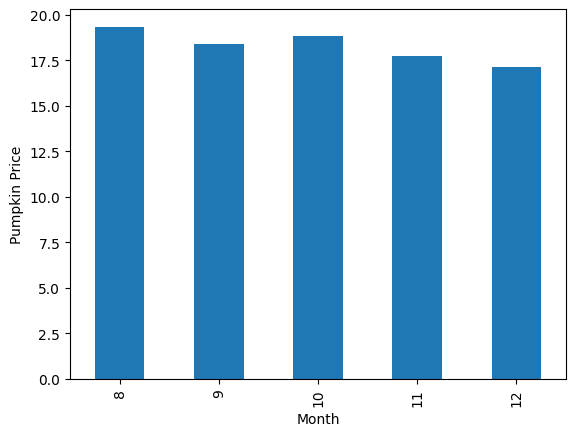

In [17]:
import matplotlib.pyplot as plt
new_pumpkins.groupby(['Month'])['Avg Price'].mean().plot(kind="bar")
plt.ylabel("Pumpkin Price")